In [12]:
import pandas as pd
import os

### Task #1 : Merging 12 Months of sales data into a single file

In [13]:
all_data  = pd.DataFrame()
files = [file for file in os.listdir('Sales_Data')]
for file in files:
    df = pd.read_csv("Sales_Data/"+file)
    all_data = pd.concat([all_data,df])
all_data.to_csv("all_data.csv",index=False)

### Read in updated dataframe

In [14]:
all_data = pd.read_csv("all_data.csv")

### Clean up the Data

In [15]:
# Drop rows of NAN
#nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='any')

### Find 'or' and delete it

In [16]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [17]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Task 2 : Add Month Column

In [18]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')

### Task 3: Add a sales column

In [19]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
#all_data.head()

### Task 4 : Add a city column

In [20]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
all_data['City'] = all_data['Purchase Address'].apply(lambda x : f"{get_city(x)} ({get_state(x)})") 
#all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])

### Question 1 : What was the best month for Sales? How much was earned that mount?

In [21]:
results = all_data.groupby('Month').sum()

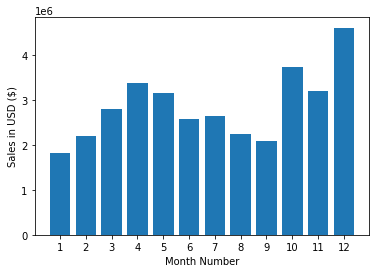

In [22]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months,results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### Question 2 :  Which city had the highest number of sales ?

In [23]:
results = all_data.groupby('City').sum()

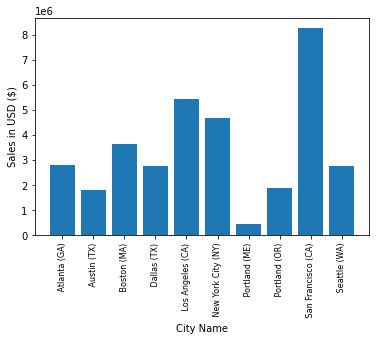

In [24]:
#cities = all_data['City'].unique()
cities  = [city for city , df in all_data.groupby('City')]

plt.bar(cities,results['Sales'])
plt.xticks(cities,rotation = "vertical",size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### Question 3 : What time should we display advertisements to maximize likelihood of customer's buying product?

In [25]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [26]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

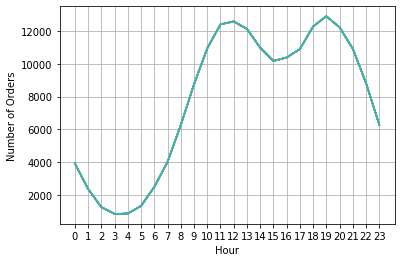

In [27]:
hours = [hour for hour, df in all_data.groupby('Hour')]
plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()
# Around 11am (11) or 7pm (19)

### Question 4 : What products are most often sold together?

In [28]:
df = all_data[all_data['Order ID'].duplicated(keep = False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key , value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Question 5 : What product sold the most? Why do you think it sold the most?

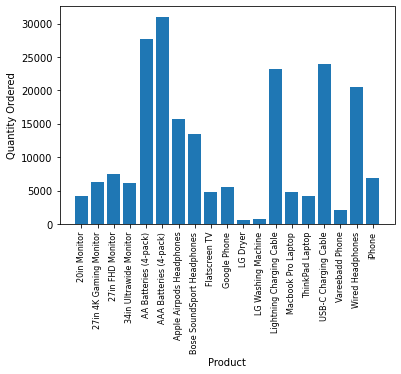

In [30]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product , df in product_group]

plt.bar(products , quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products , rotation = 'vertical' , size = 8)
plt.show()



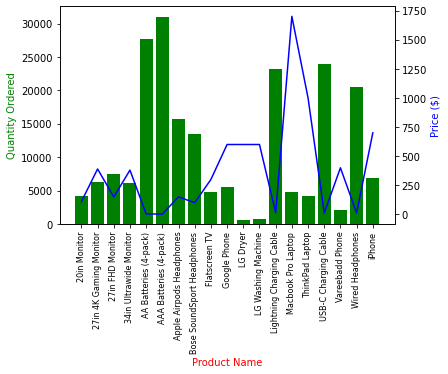

In [31]:
prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2= ax1.twinx()
ax1.bar(products,quantity_ordered,color='g')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name',color = 'r')
ax1.set_ylabel('Quantity Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products,rotation = 'vertical',size = 8)

plt.show()